# **Black Friday Sales Prediction**

## **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

## **Data Exploration and Analysis**

In [2]:
train = pd.read_csv("D:\Datasets\\train\\train.csv")
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
# Check shape of data
print(f"Number of rows: {train.shape[0]}")
print(f"Number of columns: {train.shape[1]}")

Number of rows: 550068
Number of columns: 12


In [4]:
# Check  datatypes of features
train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [5]:
# Check number of unique values in each column
for column in train.columns:
    print(f"{column}: {len(train[column].unique())}")

User_ID: 5891
Product_ID: 3631
Gender: 2
Age: 7
Occupation: 21
City_Category: 3
Stay_In_Current_City_Years: 5
Marital_Status: 2
Product_Category_1: 20
Product_Category_2: 18
Product_Category_3: 16
Purchase: 18105


In [6]:
# Check NULL values in the data
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


C:\Users\vshra\AppData\Local\Temp\ipykernel_33116\2504947512.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train.corr().abs()


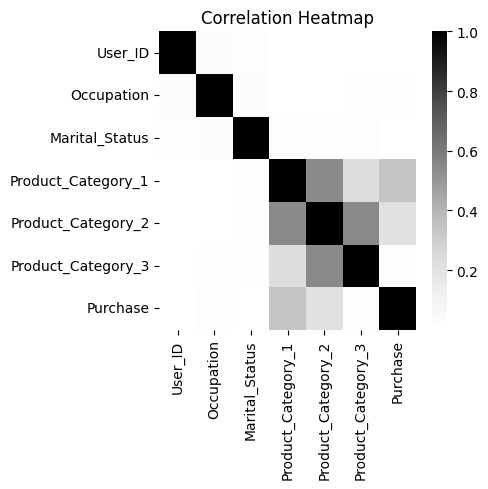

In [8]:
# Check Correlation among columns
# Calculate the correlation matrix

correlation_matrix = train.corr().abs()

# Plot the correlation heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, cmap='Greys',  annot=False)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

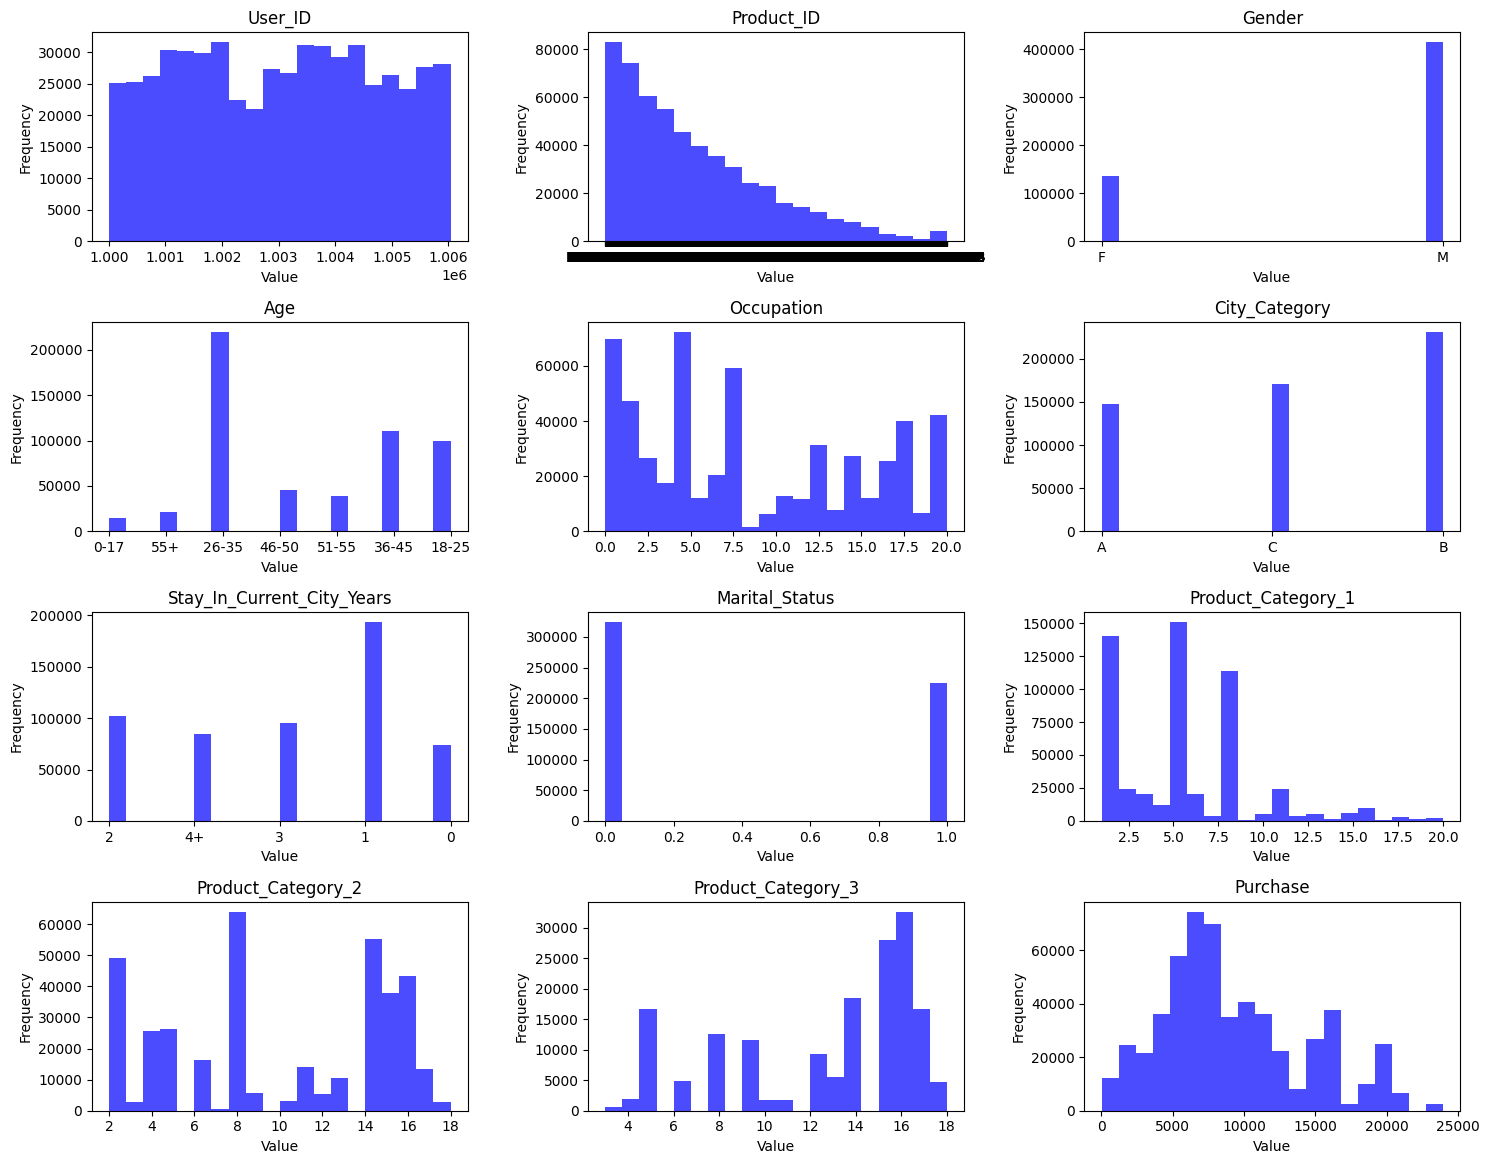

In [9]:
# Determine the number of rows and columns for the grid
num_rows = 7
num_cols = 3

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Flatten the axes array to loop through all subplots
axes = axes.flatten()

# Plot histograms for each column
for i, col in enumerate(train.columns):
    ax = axes[i]
    ax.hist(train[col], bins=20, color='blue', alpha=0.7)
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Hide any remaining empty subplots
for i in range(len(train.columns), num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust layout to prevent subplot overlap
plt.tight_layout()

# Show the plots
plt.show()

## **Create Preprocessing Pipeline**

In [10]:
def preprocess_train(df):
    df = df.drop_duplicates() # Drop duplicate rows
    
    # One Hot Encoding
    gender = pd.get_dummies(df["Gender"], drop_first=True)
    city_cat = pd.get_dummies(df["City_Category"], drop_first=True)
    marital_status = pd.get_dummies(df["Marital_Status"], drop_first=True)
    age = pd.get_dummies(df["Age"], drop_first=True)
    stay_curr_city = pd.get_dummies(df["Stay_In_Current_City_Years"], drop_first=True)

    # Drop One hot encoded columns and concat with existing dataframe
    df = df.drop(["Gender", "City_Category", "Marital_Status", "Age", "Stay_In_Current_City_Years"], axis=1)
    df = pd.concat([df, gender, city_cat, marital_status, age, stay_curr_city], axis=1)
    
    # Label Encoding
    le = LabelEncoder()
    df['User_ID'] = le.fit_transform(df['User_ID'])
    le = LabelEncoder()
    df['Product_ID'] = le.fit_transform(df['Product_ID'])
    le = LabelEncoder()
    df['Product_Category_1'] = le.fit_transform(df['Product_Category_1'])

    df = df.drop(['Product_Category_2', 'Product_Category_3'], axis=1) # Drop columns with majority NULL values
    
    df.columns = df.columns.astype(str) # Convert column names to strings
    df.columns.values[15]='1_2'

    X_train, X_test, y_train, y_test = train_test_split(df.drop("Purchase", axis=1), df["Purchase"], test_size=0.25, random_state=69)

    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test, df

In [11]:
X_train, X_test, y_train, y_test, train = preprocess_train(train)

## **Model Training**

In [12]:
import pycaret

In [ ]:
from pycaret.regression import *
exp_name = setup(data = train,  target = 'Purchase', use_gpu=True)
best_model = compare_models()